In [1]:
! pip install texttable --quiet

In [2]:
import sympy as sy
import fractions as fr
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special
from texttable import Texttable
import scipy.stats
import scipy.special
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('fivethirtyeight')
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True) # suppress scientific notation

To proceed with inferential statistics, there is no way to circumvent **probability theory** and it's undoubtedly the most important mathematical subject should you ever know in your life. Once probability view deeply implanted in your mind, you would have a revolutionary world view.

Here we will review the probability theory in a textbook style, i.e. start from defining sets.

# <font face="gotham" color="purple"> Basic Concepts Refresh</font>

## <font face="gotham" color="purple"> Sets</font>

A set is a collection of _distinct elements_, for instance, $(1, 2, 3)$ is a set, but $(2, 2, 3)$ isn't. Here we will demonstrate a bit of **SymPy** library, only scratching the surface. SymPy is an extremely powerful library, there are extensive examples in the <a href="https://github.com/MacroAnalyst/Linear_Algebra_With_Python">**Linear Algebra With Python**<a> training sessions.

We'll start from defining sets then basic operations. ```sy.``` is alias of ```sympy```.

In [3]:
s = sy.FiniteSet(2, 3, 4, 5, 6); s

{2, 3, 4, 5, 6}

In [4]:
s1 = sy.FiniteSet(2, 1/2, fr.Fraction(1,2), 8); s1 #Fraction subject can keep the fraction format

{0.5, 1/2, 2, 8}

Check if $2$ is in the set $S_1$

In [6]:
x = 2
if x in s1:
    print('{} is in the set!'.format(x))

2 is in the set!


Convert a list into a set, the list needs unpacking with $*$.

In [7]:
s3_list = [1, 3, 5, 7, 8]
s3 = sy.FiniteSet(*s3_list); s3

{1, 3, 5, 7, 8}

## <font face="gotham" color="purple"> Subsets, Supersets and Power Sets</font>

Now define two sets, $a$ is a **superset** of $b$ ($a\supseteq b$), then $b$ is called a **subset** of $a$ ($b\subseteq a$).

In [8]:
a = sy.FiniteSet(1,2,3,4,5)
b = sy.FiniteSet(2,3,4)

In this example, $a$ is a **proper superset** of $b$ denoted as $a\supset b$, $b$ is a **proper subset** of $a$ denoted as $b\subset a$.

The methods ```is_subset``` and ```is_superset``` are doing exactly as their names say.

In [9]:
b.is_subset(a)

True

In [10]:
a.is_superset(b)

True

The **powerset** is set contains all subsets, including the empty set and itself.

In [11]:
b.powerset()

FiniteSet(EmptySet, {2}, {3}, {4}, {2, 3}, {2, 4}, {3, 4}, {2, 3, 4})

In [12]:
b.is_subset(b)

True

In [13]:
b.is_proper_subset(b)

False

## <font face="gotham" color="purple"> Set Operations</font>

Define two sets again.

In [14]:
a = sy.FiniteSet(1,2,3)
b = sy.FiniteSet(2,3,4)
display(a)
display(b)

{1, 2, 3}

{2, 3, 4}

**Union** and **intersection** are sympy object methods, the same as we've learned in high school.

In [15]:
display(a.union(b))
display(a.intersect(b))

{1, 2, 3, 4}

{2, 3}

## <font face="gotham" color="purple"> Python Built-in Sets And Operations</font>

Sets operations are fairly common in general programming, therefore Python has built-in operations for sets. Here are examples using built-in function.

We define sets in Python with ```{}```, which are the same for the dictionaries.

In [16]:
a = {1, 3, 5, 7, 9}
b = {1, 7, 10}

In [17]:
type(a)

set

Union operation.

In [19]:
a | b

{1, 3, 5, 7, 9, 10}

or

In [21]:
a.union(b)

{1, 3, 5, 7, 9, 10}

Intersection.

In [22]:
a & b

{1, 7}

Or

In [23]:
a.intersection(b)

{1, 7}

Set difference.

In [24]:
a - b

{3, 5, 9}

In [25]:
a.difference(b)

{3, 5, 9}

## <font face="gotham" color="purple"> Cartesian Product</font>

The famous **Cartesian product** is defined mathematically as below.

Two sets multiply each other, the result presents all the possible ordered paired, the first element from $A$, the second element from $B$.

$$
A\times B=\{(a,b)\mid a\in A\ {\mbox{ and }}\ b\in B\}
$$

A visual example would be helpful. Define two sets, then compute the Cartesian product by multiplication.

In [27]:
x = sy.FiniteSet(*list(range(1, 6)))
y = sy.FiniteSet(*list(range(2, 7)))
z = x*y #Cartesian producet
z

ProductSet({1, 2, 3, 4, 5}, {2, 3, 4, 5, 6})

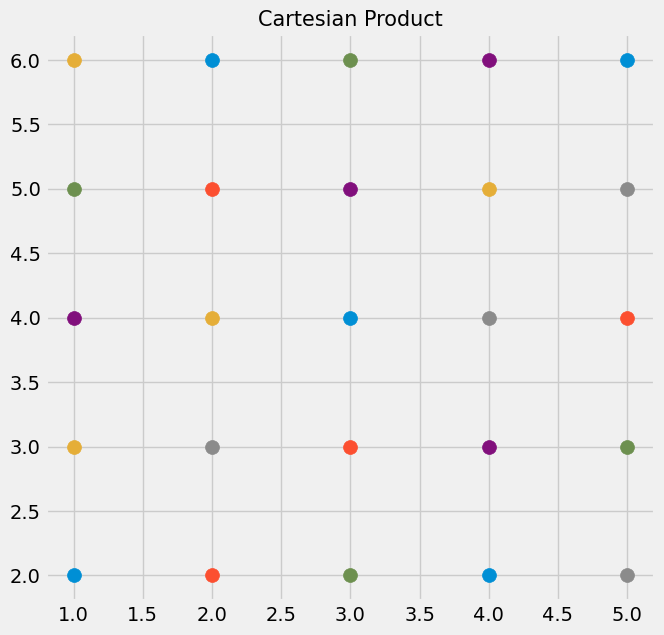

In [28]:
fig, ax = plt.subplots(figsize = (7, 7))

for i in z:
    ax.scatter(i[0], i[1], s = 100)

ax.grid(True)
ax.set_title('Cartesian Product', size = 15)
plt.show()

Here's a more concrete example of Cartesian product, suppose H&M has a type of dress with different parameters, a Cartesian product will show them all combinations they could have. For instance, a dress with parameters $( 'blue', 'polyester')$.

In [29]:
colours = sy.FiniteSet('red', 'black', 'blue', 'white')
material = sy.FiniteSet('wool', 'cotton', 'polyester')
colours * material

ProductSet({black, blue, red, white}, {cotton, polyester, wool})

## <font face="gotham" color="purple"> Probability and Event

After demonstrating so many sets theory, but how are they used in probability theory?

Dice rolling problem never gets old. To answer the question: _what is the probability of rolling an odd number_? We will show how to answer the question with set operations.

In [30]:
s = sy.FiniteSet(1,2,3,4,5,6)
odd = sy.FiniteSet(1,3,5)
p = len(odd)/len(s)
p

0.5

This is vastly intuitive, just the proportion of odd sides over all sides.

## <font face="gotham" color="purple"> Two Dice Problem</font>

Two dice problem is slightly more complicated. Now we are asking: _what's the probability of getting a $7$ while rolling them together_.

Create a dictionary to hold the Cartesian product of two dice and its sum. The ```.update``` function is for adding elements in the dictionary if the updated key didn't exist.

In [31]:
dice_cartesian = {}
for i in range(1,7):
    for j in range(1,7):
        dice_cartesian.update({(i, j):i + j})
dice_cartesian

{(1, 1): 2,
 (1, 2): 3,
 (1, 3): 4,
 (1, 4): 5,
 (1, 5): 6,
 (1, 6): 7,
 (2, 1): 3,
 (2, 2): 4,
 (2, 3): 5,
 (2, 4): 6,
 (2, 5): 7,
 (2, 6): 8,
 (3, 1): 4,
 (3, 2): 5,
 (3, 3): 6,
 (3, 4): 7,
 (3, 5): 8,
 (3, 6): 9,
 (4, 1): 5,
 (4, 2): 6,
 (4, 3): 7,
 (4, 4): 8,
 (4, 5): 9,
 (4, 6): 10,
 (5, 1): 6,
 (5, 2): 7,
 (5, 3): 8,
 (5, 4): 9,
 (5, 5): 10,
 (5, 6): 11,
 (6, 1): 7,
 (6, 2): 8,
 (6, 3): 9,
 (6, 4): 10,
 (6, 5): 11,
 (6, 6): 12}

Python dictionary has a method ```.items()``` that lists all key-value pairs in tuples. We'll make use of this method in the loop below.

In [32]:
dice_cartesian.items()

dict_items([((1, 1), 2), ((1, 2), 3), ((1, 3), 4), ((1, 4), 5), ((1, 5), 6), ((1, 6), 7), ((2, 1), 3), ((2, 2), 4), ((2, 3), 5), ((2, 4), 6), ((2, 5), 7), ((2, 6), 8), ((3, 1), 4), ((3, 2), 5), ((3, 3), 6), ((3, 4), 7), ((3, 5), 8), ((3, 6), 9), ((4, 1), 5), ((4, 2), 6), ((4, 3), 7), ((4, 4), 8), ((4, 5), 9), ((4, 6), 10), ((5, 1), 6), ((5, 2), 7), ((5, 3), 8), ((5, 4), 9), ((5, 5), 10), ((5, 6), 11), ((6, 1), 7), ((6, 2), 8), ((6, 3), 9), ((6, 4), 10), ((6, 5), 11), ((6, 6), 12)])

Use ```defaultdict``` from ```collections``` module, it creates a dictionary which doesn't report errors and suitable for counting. We pass ```list``` as the _default factory_, meaning initialising values as lists whenever the key is given.

In [33]:
from collections import defaultdict
dice_count = defaultdict(list)
for i,j in dice_cartesian.items():
    dice_count[j].append(i)
dice_count

defaultdict(list,
            {2: [(1, 1)],
             3: [(1, 2), (2, 1)],
             4: [(1, 3), (2, 2), (3, 1)],
             5: [(1, 4), (2, 3), (3, 2), (4, 1)],
             6: [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)],
             7: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)],
             8: [(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)],
             9: [(3, 6), (4, 5), (5, 4), (6, 3)],
             10: [(4, 6), (5, 5), (6, 4)],
             11: [(5, 6), (6, 5)],
             12: [(6, 6)]})

Create another dictionary holding all sums of dice and corresponding probabilities.

In [35]:
Prob = {i:round(len(j)/6**2, 4) for i,j in dice_count.items()}; Prob

{2: 0.0278,
 3: 0.0556,
 4: 0.0833,
 5: 0.1111,
 6: 0.1389,
 7: 0.1667,
 8: 0.1389,
 9: 0.1111,
 10: 0.0833,
 11: 0.0556,
 12: 0.0278}

The example above actually is more about Python techniques, it also can be conveniently solved without making a fuss, as below:

In [37]:
def dice_prob(number):
    dice1, dice2 = list(range(1, 7)), list(range(1, 7))
    cartesian_dice = [(i, j) for i in dice1 for j in dice2] # list comprehension to create Cartesian product
    ocurrence = 0
    for element in cartesian_dice:
        if np.sum(list(element)) == number:
            ocurrence += 1
    print('The probability of {} while rolling two dice is {:.2f}%'.format(number, ocurrence/6**2*100))

In [38]:
dice_prob(7)

The probability of 7 while rolling two dice is 16.67%


## <font face="gotham" color="purple"> Combination And Permutation</font>

Again, high school skills, two question to help differentiate them.
<ol>
<li>Pick 3 letters from English alphabet, how many ways to choose? <i>Use combination.</i></li>
<li>Pick 3 letters from English alphabet to construct a word (doesn't have to be meaningful), how many ways to choose? <i>Use permutation.</i><\li>
</ol>

Just remember: whenever needs certain order, use permutation, like the second question above, 'dog' and 'god' are different words though letters are the same. We don't need to memorise formula, but still FYI

$$
_nC_N = \frac{N!}{n!(N-n)!}\\
_nP_N = \frac{N!}{(N-n)!}
$$

In [39]:
scipy.special.comb(26, 3) # combination

2600.0

In [40]:
scipy.special.perm(26, 3) # permutation

15600.0

# <font face="gotham" color="purple"> Conditional Probability, Multiplication Law and Independence</font>

All above are just warm-up, from here on comes the real deal of probability theory.

The probability of A given B, so called **conditional probability**, defined as:

\begin{equation}
\frac{P(A\cap B)}{P(B)}=P(A|B)
\end{equation}

It is best to be demonstrated by a joint probability table, which is essentially a discrete numeric form of 3D distribution.

Here I want to introduce a module of draw text-style table, particular useful when you working on shells. Install in jupyter with ```conda install -c conda-forge texttable```.

In [41]:
table = Texttable()
table.set_cols_align(["l", "c", "c", 'c'])
table.set_cols_valign(["m", "m", "m", 'm'])
table.add_rows([["", "Have Ht. Disease", " Not Have ", ' Total '],
                ["Male", 0.45, 0.06, 0.51],
                ["Femal", 0.36, 0.13, 0.49],
                ["Total", 0.81, 0.19, 1]])
print(table.draw())

+-------+------------------+------------+---------+
|       | Have Ht. Disease |  Not Have  |  Total  |
+=======+==================+============+=========+
| Male  |      0.450       |   0.060    |  0.510  |
+-------+------------------+------------+---------+
| Femal |      0.360       |   0.130    |  0.490  |
+-------+------------------+------------+---------+
| Total |      0.810       |   0.190    |    1    |
+-------+------------------+------------+---------+


**Marginal probability** is the key concepts, which got its name because located on the margin of a table, it is the sum of all probabilities from the same column or row.

The marginal probability of having heart disease is $81\%$ and marginal probability of not having is $19\%$.

Here is the question: _what is the probability of not having heart disease given the person is a woman_? Because the condition is that _the person must be a woman_. So the first step is to narrow down the table.

In [42]:
table = Texttable()
table.set_cols_align(["l", "c", "c", 'c'])
table.set_cols_valign(["m", "m", "m", 'm'])
table.add_rows([["", "Have Ht. Disease", " Not Have ", ' Total '],
                ["Femal", 0.36, 0.13, 0.49]])
print(table.draw())

+-------+------------------+------------+---------+
|       | Have Ht. Disease |  Not Have  |  Total  |
+=======+==================+============+=========+
| Femal |      0.360       |   0.130    |  0.490  |
+-------+------------------+------------+---------+


So the conditional probability of a woman not having heart disease is
$$
\frac{P(A\cap B)}{P(B)} = \frac{.13}{.49}
$$

In [43]:
P_female = 0.49 # the marginal prob of being a women, this is P(B)
P_female_no_disease = 0.13
P_con = P_female_no_disease/P_female
print('The probability of not having heart disease given the person is a woman is {0:.2f}%'.format(P_con*100))

The probability of not having heart disease given the person is a woman is 26.53%


From conditional probability it is straightforward to deduct **multiplication law**, simply rearrange the formula
$$
P(A|B)P(B)=P(A\cap B)\\
P(B|A)P(A)=P(B\cap A)
$$

Two events $A$ and $B$ are independent if
$$
P(A|B)=P(A)\\
P(B|A)=P(B)
$$

Otherwise, the events are dependent.

Then the **independent multiplication law** indicates
$$
P(A)P(B)=P(A\cap B)\\
P(B)P(A)=P(B\cap A)
$$

# <font face="gotham" color="purple"> Random variable , PDF, PMF, CDF </font>

Sure, I'd be happy to explain random variables, probability density functions (PDFs), cumulative distribution functions (CDFs), and probability mass functions (PMFs) to a high school student with some intuitive examples and Python code. Let's start with the basics.

**Random Variable (RV):**
A random variable is a variable that can take on different values with some degree of randomness. It represents the outcomes of a random experiment or process. For example, when you roll a fair six-sided die, the outcome (the number you get, like 1, 2, 3, etc.) is a random variable.

**Probability Density Function (PDF):**
A PDF is a function that describes the probability of a continuous random variable taking on a particular value. It's like a "smooth" version of a PMF (which we'll explain next). The area under the PDF curve over a range represents the probability that the random variable falls within that range.

**Cumulative Distribution Function (CDF):**
A CDF, on the other hand, gives you the probability that a random variable takes on a value less than or equal to a specific value. It's the cumulative sum of the PDF values up to that point.

**Probability Mass Function (PMF):**
A PMF is similar to a PDF but is used for discrete random variables (those with distinct, separate values). It assigns probabilities to each possible value of the random variable.

Let's demonstrate these concepts with an example using a continuous random variable, such as the height of people in a population:

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example data: heights of people (normally distributed)
mean_height = 170  # Mean height in cm
std_deviation = 10  # Standard deviation in cm

# Generate a range of heights
x = np.linspace(140, 200, 1000)

# Probability Density Function (PDF)
pdf = norm.pdf(x, loc=mean_height, scale=std_deviation)

# Cumulative Distribution Function (CDF)
cdf = norm.cdf(x, loc=mean_height, scale=std_deviation)

# Plot the PDF and CDF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, pdf, label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('Height (cm)')
plt.ylabel('Probability')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Height (cm)')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()
```

In this code, we assume that the heights of people follow a normal distribution. We calculate and plot the PDF and CDF for this distribution. The PDF shows how likely it is for a person to have a specific height, while the CDF shows the cumulative probability of being shorter than a given height.


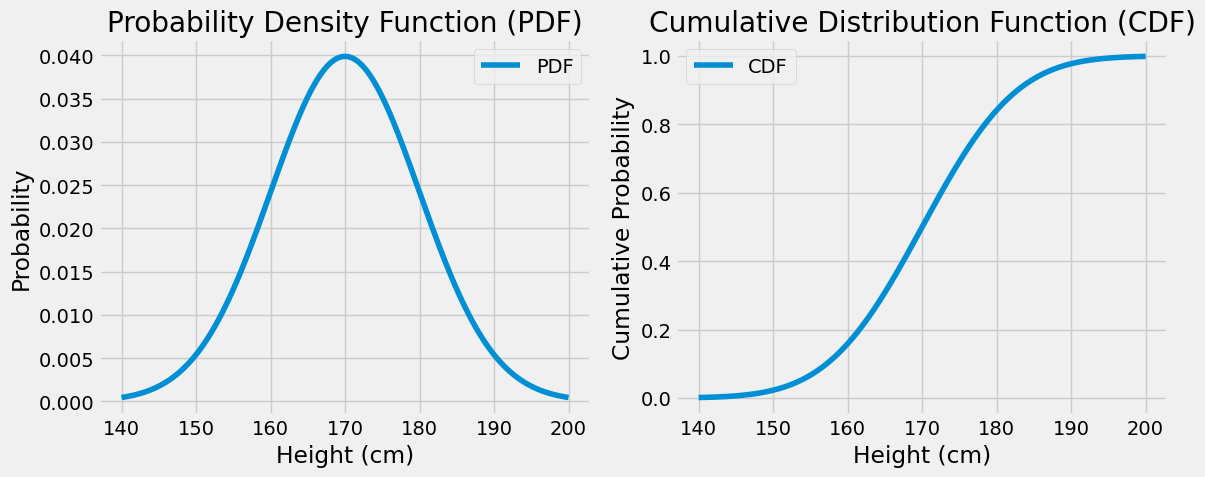

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example data: heights of people (normally distributed)
mean_height = 170  # Mean height in cm
std_deviation = 10  # Standard deviation in cm

# Generate a range of heights
x = np.linspace(140, 200, 1000)

# Probability Density Function (PDF)
pdf = norm.pdf(x, loc=mean_height, scale=std_deviation)

# Cumulative Distribution Function (CDF)
cdf = norm.cdf(x, loc=mean_height, scale=std_deviation)

# Plot the PDF and CDF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, pdf, label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('Height (cm)')
plt.ylabel('Probability')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Height (cm)')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()


# <font face="gotham" color="purple"> Distributions That You Should Know</font>

These are most important probability distributions that you should know by heart.

## <font face="gotham" color="purple"> Binomial Distribution</font>

The first one is binomial distribution, we will give a it more extensive coverage, other distributions have similar functions in Python.

A binomial experiment has 4 features:
* A sequence of $n$ identical trials, e.g. throwing darts
* Only two outcomes are possible: _success_ or _failure_, e.g. hitting bullseye or not
* The probability of success $p$ does not change from trial to trial
* Trials are independent events, e.g. first throw doesn't affect the second throw

The **probability mass function(PMF)** of binomial distribution is

<p style="font-size:17px">
$$
f(k,n,p)=_nC_k p^kq^{n-k}
$$
<p>

<table style="text-align:center; width:50%; text-align:center;font-size: 110% ">
  <tr>
    <th>parameters</th>
    <th>meaning</th>
  </tr>
  <tr>
    <td>$n$</td>
    <td>number of trials</td>
  </tr>
  <tr>
    <td>$k$</td>
    <td>number of specific outcome</td>
  </tr>
  <tr>
    <td>$p$</td>
    <td>probability of success</td>
  </tr>
  <tr>
    <td>$q$</td>
    <td>probability of failure</td>
  </tr>
</table>

Here's a simple example.

A personal banker might meet 50 people enquiring for loan monthly, empirically 30% of them has bad credit history. So calculate probability from 1 to 50 people has bad credit history, meaning calculate 1 person out of 50 has bad credit, 2 persons out of 50 have bad credit, so on so forth till 50 persons (all of them).

Start from a single number could be more intuitive, what's probability that a personal banker to encounter exact $14$ persons of bad credit history in a month?

In [46]:
n = 50
k = 14 # what is the prob that exact 14 ppl she met had bad credit history?
b = scipy.special.comb(50, 14)
p = .3
f_binomial = b*p**k*(1-p)**(n-k)
print('The prob of meeting {0} persons who has bad credit history is {1:.2f}%.'.format(k, f_binomial * 100))

The prob of meeting 14 persons who has bad credit history is 11.89%.


We can use ```scipy.stats.binom.pmf``` to get an array of PMF.

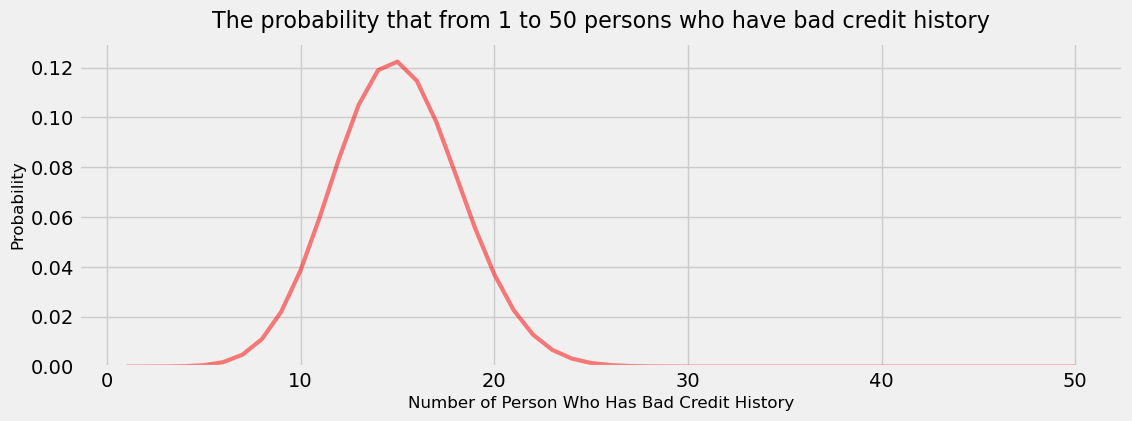

In [47]:
n = 50
p = .3
bad_credit_person = np.arange(1, 51)
prob = sp.stats.binom.pmf(bad_credit_person, n, p)
fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(bad_credit_person, prob, lw = 3, color = 'r', alpha = .5)
ax.set_ylim([0, .13])
ax.set_title('The probability that from 1 to 50 persons who have bad credit history', size = 16, x = .5, y = 1.02)
ax.set_xlabel('Number of Person Who Has Bad Credit History', size = 12)
ax.set_ylabel('Probability', size = 12)
plt.show()

We could interpret the plot with straightforward observation:
<li>Most likely the personal banker would encounter $10$ to $20$ persons who have bad credit history.</li>
<li>Encountering less than $5$ or more than $25$ person are less likely.</li>
<li>The highest possibility is to encounter $50\times .03 = 15$ persons with bad credit.</li>

Next example we can formulate a question by using **cumulative probability distribution**, the SciPy function is ```scipy.stats.binom.cdf```.

If a stock trader trades $n$ times a month, he has a $p%$ chance of winning the trade, find out the probability that he can win less than $k$ trades a month.

In [48]:
n = 20
p = .55
k = 12
k1, k2 = 14, 4

win_less = sp.stats.binom.cdf(k, n, p)
win_more = 1- sp.stats.binom.cdf(k, n, p)
win_betw = sp.stats.binom.cdf(14, n, p) - sp.stats.binom.cdf(4, n, p)

print("If a trader's winning rate is {:.0f}%, the probability of winning less than {} times is {:.1f}% if he trades {} per month.".format(p*100, k, win_less*100, n))
print("If a trader's winning rate is {:.0f}%, the probability of winning more than {} times is {:.1f}% if he trades {} per month.".format(p*100, k, win_more*100, n))
print("If a trader's winning rate is {:.0f}%, the probability of winning between {} and {} times is {:.1f}% if he trades {} per month.".format(p*100, k1, k2, win_betw*100, n))

If a trader's winning rate is 55%, the probability of winning less than 12 times is 74.8% if he trades 20 per month.
If a trader's winning rate is 55%, the probability of winning more than 12 times is 25.2% if he trades 20 per month.
If a trader's winning rate is 55%, the probability of winning between 14 and 4 times is 94.3% if he trades 20 per month.


Or present in the text table.

In [49]:
table = Texttable()
table.set_cols_align([ "c", "c", 'c'])
table.set_cols_valign([ "m", "m", 'm'])
table.add_rows([["Win Less", " Win More ", ' Win btw 4~14 '],
                [ win_less, win_more, win_betw]])
print(table.draw())

+----------+------------+----------------+
| Win Less |  Win More  |  Win btw 4~14  |
+==========+============+================+
|  0.748   |   0.252    |     0.943      |
+----------+------------+----------------+


What if the probability of wining changing from 0.1 to 0.8, what is the probability that he wins less than 6 trades, assuming every month he trades 20 times.

In [50]:
win_rate = np.arange(.1, .81, .05)
win_less = sp.stats.binom.cdf(6, 20, win_rate)

data_dict = {'win_rate':win_rate, 'win_less':win_less} # I am using annotation in matplotlib, so Pandas is used for easy tracking data points
df = pd.DataFrame(data_dict)
df

,win_rate,win_less
0,0.10,0.997614
1,0.15,0.978065
2,0.20,0.913307
3,0.25,0.785782
4,0.30,0.608010
5,0.35,0.416625
6,0.40,0.250011
7,0.45,0.129934
8,0.50,0.057659
9,0.55,0.021414


According to the table above, if the trader has at least $60\%$ winning rate, merely $0.6\%$ probability that he wins less then $6$ trades. Marginally higher winning rates are even important for traders in the short run.

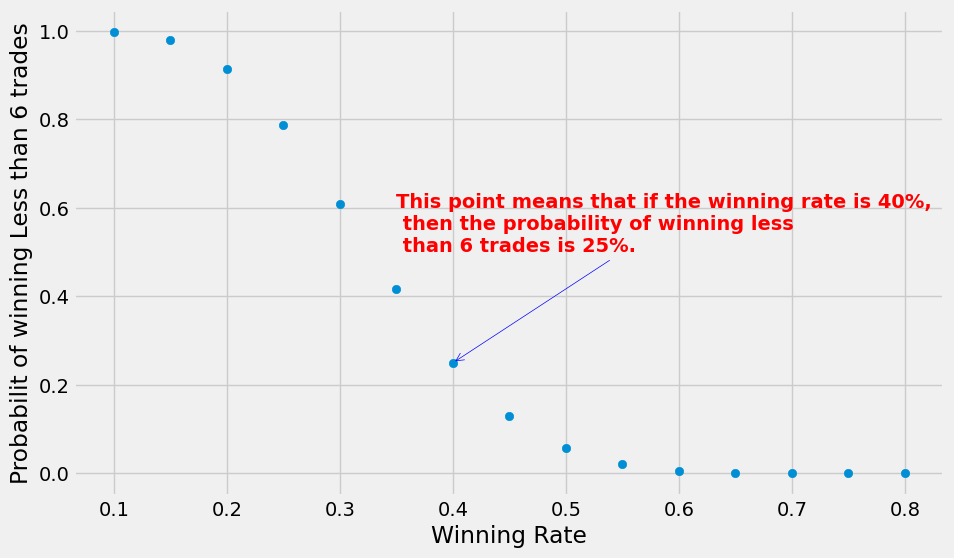

In [51]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(win_rate, win_less)
txt = 'This point means that if the winning rate is 40%,\n then the probability of winning less\n than 6 trades is 25%.'
ax.annotate(txt, xy = (df.iloc[6][0], df.iloc[6][1]), xytext = (.35, .5), weight = 'bold', color  =  'r', size = 14,
             arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'b'))
ax.set_xlabel('Winning Rate')
ax.set_ylabel('Probabilit of winning Less than 6 trades')
plt.show()

## <font face="gotham" color="purple"> Poisson Distribution</font>

When $n\rightarrow\infty$ and $p\rightarrow0$，a binomial distribution approaches a **Poisson distribution** asymptotically, i.e. when $n$ is large and $p$ is small, we can use Poisson to approximate Binomial.

Again with trader's example, if a trader has $1/1000$ probability to encounter a 'wiped-out' in each trade (assume each trade is independent, actually not), and trades $20$ times per month, what is the probability that the trader will encounter twice 'wiped-out' within 5 years?

This problem can be solved by Binomial, the formulation as below

$$
\text{trades} = 20\times 12\times 5=1200\\
P(x=2) = \binom{1200}{2}\Big(\frac{1}{1000}\Big)^2\Big(\frac{999}{1000}\Big)^{1198}
$$

In [52]:
sp.special.comb(1200, 2)*1/1000**2*(999/1000)**1198

0.2169828095260339

The result tells that if a trader keep a frequency of $20$ trades per month, there $21\%$ possibility that he/she gets wiped out twice in next $5$ years.

As we mentioned, Poisson is the limit version of Binomial, it is a suitable case to use, calculate $\lambda$

\begin{equation}
\lambda = np = 1200 \times \frac{1}{1000} = 1.2
\end{equation}

it means every 5 years, there is in average 1.2 times of chance to get wiped out.

\begin{equation}
P(x=2)=\frac{\lambda^ke^{-\lambda}}{k!}=\frac{1.2^2e^{-1.2}}{2!}
\end{equation}


Formulate in Python

In [53]:
k = 2
n = 20 * 12 * 5 # 20 times per month, and 5 years span
p = 1/1000
lambdaP = p * n # lambda in Poisson
p = sp.stats.poisson.pmf(k, lambdaP)
print('The probability of having {0} wiped-out shock(s) in a span of 5 years is {1:.2f}%.'.format(k, p*100))

The probability of having 2 wiped-out shock(s) in a span of 5 years is 21.69%.


You probably have notices that Binomial and Poisson provide the same answer.

Similarly what's the probability of having more than $k$ times wiped-out?

In [54]:
k = 2
prob = 1 - sp.stats.poisson.cdf(k, lambdaP)
print('The probability of having more than %1.0f BS shock in 5 years is %3.3f%%.' % (k, prob*100))

The probability of having more than 2 BS shock in 5 years is 12.051%.


## <font face="gotham" color="purple"> Geometric Distribution</font>

The PMF of **Geometric Distribution** is
$$
f(k)=p(1-p)^k
$$

where  $k \in  \mathbb{Z}^+$ is a number of failures before first success, and $p$ is the probability of success.

Geometric Distribution is to model the solutions to questions: '_How many times you have to fail in order to embrace the initial success?_'

If you are shooting basketball to the basket, your success rate is $30\%$, what's the probability of first success after $k$ times of trials?

In [55]:
k = 5
p = .3

geo_dist = (1 - p)**k * p
print('The probability of observing exact {} times of failures trials before first success is {:.2f}%.'.format(k, geo_dist*100))

The probability of observing exact 5 times of failures trials before first success is 5.04%.


```sp.stats.geom.pmf``` function will do the same trick.

In [56]:
sp.stats.geom.pmf(k, p)

0.07202999999999998

However, you have noticed the same parameters didn't produce the same result. That's because Scipy has a slightly different definition of parameter, $k$ in Scipy means the total number of trials, therefore $k+1$ would work the same.

In [57]:
sp.stats.geom.pmf(k+1, p)

0.05042099999999998

Again, CDF could answer the a question: _What's the probability of observing $k$ or less than $k$ times of failure before the first success?_

In [58]:
geom_cdf = sp.stats.geom.cdf(k+1, p)
print('The probability of observing %1.0f or fewer than %1.0f times of failure before a first success is %3.3f%%.'%(k,k,geom_cdf*100))

The probability of observing 5 or fewer than 5 times of failure before a first success is 88.235%.


## <font face="gotham" color="purple"> Discrete Uniform Distribution</font>

Rolling a die is the simplest **discrete uniform distribution** generator from $1$ to $6$.

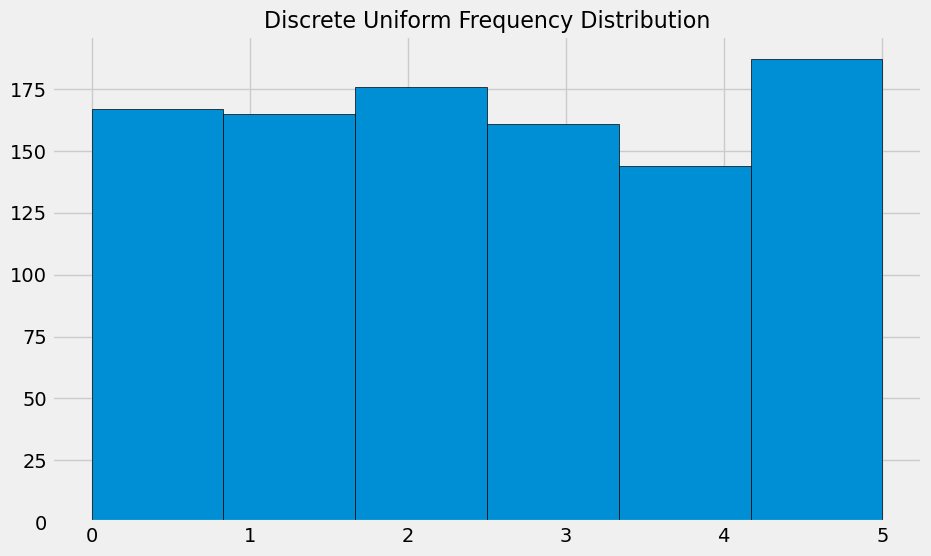

In [59]:
unif_d = sp.stats.randint.rvs(low = 0, high = 6, size = 1000)
fig, ax = plt.subplots(figsize = (10, 6))
h, bins, patches = ax.hist(unif_d, bins = 6, ec = 'k')
ax.set_title('Discrete Uniform Frequency Distribution', size = 16)
plt.show()

### <font face="gotham" color="purple"> Discrete Probability Mass Function</font>

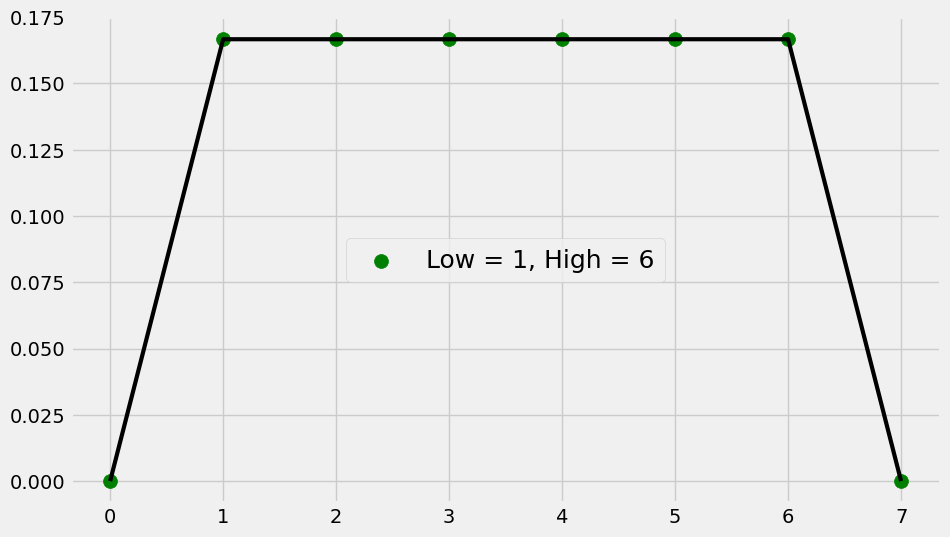

In [60]:
x = np.arange(0, 8)
l, h = 1, 7
unif_pmf = sp.stats.randint.pmf(x, low = l, high = h)
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(x, unif_pmf, s = 100, color = 'green', label =  'Low = {}, High = {}'.format(l, h-1))
ax.plot(x,unif_pmf, lw = 3, color = 'k')
ax.legend(fontsize = 18, loc = 'center')
plt.show()

## <font face="gotham" color="purple"> Continuous Uniform Distribution </font>

The PDF of *Continuous uniform distribution** is

\begin{equation}
f(x)=\frac{1}{b-a}
\end{equation}

And its r.v. generator is one of the most commonly used function in NumPy.

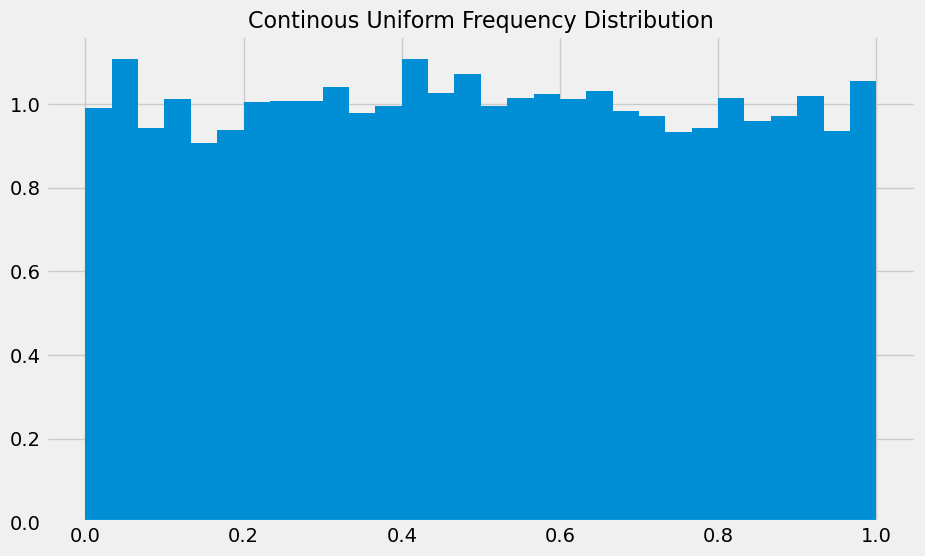

In [61]:
unif = np.random.rand(10000)
fig, ax = plt.subplots(figsize = (10, 6))
h, bins, patches = ax.hist(unif, density = True, bins = 30)
ax.set_title('Continous Uniform Frequency Distribution', size = 16)
plt.show()

## <font face="gotham" color="purple"> Normal Distribution</font>

The **normal distribution** is the king of all distributions, there are extensive discussions in my <a href="https://nbviewer.jupyter.org/github/WeijieChen-MacroAnalyst/Linear_Algebra_With_Python/blob/master/Chapter%2019%20-%20Multivariate%20Normal%20Distribution.ipynb">Linear Algbra Notes</a>. The PDF of Normal distribution is
$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}
$$
Below are the plots of CDF and PDF.

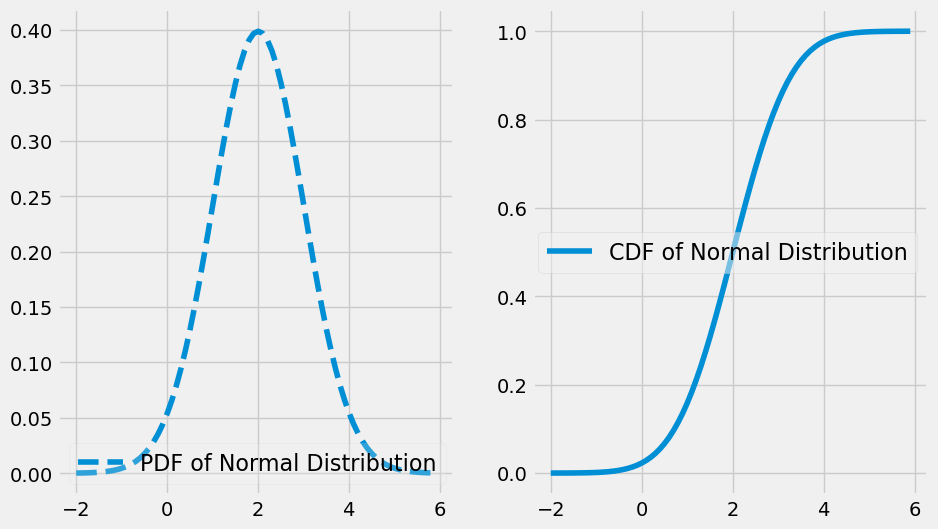

In [62]:
mu = 2
sigma = 1
x = np.arange(-2, 6, 0.1)
norm_pdf = sp.stats.norm.pdf(x, mu, sigma)
norm_cdf = sp.stats.norm.cdf(x, mu, sigma)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))
ax[0].plot(x,norm_pdf, lw = 4, label = 'PDF of Normal Distribution', ls = '--')
ax[0].legend(fontsize = 16, loc = 'lower left', framealpha=0.2)

ax[1].plot(x,norm_cdf, lw  = 4, label = 'CDF of Normal Distribution')
ax[1].legend(fontsize = 16,fancybox=True, framealpha=0.5)
plt.show()

## <font face="gotham" color="purple"> $\chi^2$ Distribution</font>

$\chi^2$ distribution is closely connected with normal distributions, if $z$ has the standard normal distribution, then $z^2$ has the $\chi^2$ distribution with $d.f.=1$. And further,if

\begin{equation}
z_1, z_2, ..., z_k \sim i.i.d. N(0, 1)
\end{equation}

Then summation has a $\chi^2$ distribution of $d.f. = k$:

\begin{equation}
\sum_{i=0}^k z_i^2 \sim \chi^2(k)
\end{equation}


We will see in later chapters how $\chi^2$ distribution is referred when performing hypothesis testing.

### <font face="gotham" color="purple"> $\chi^2$ PDF and CDF </font>

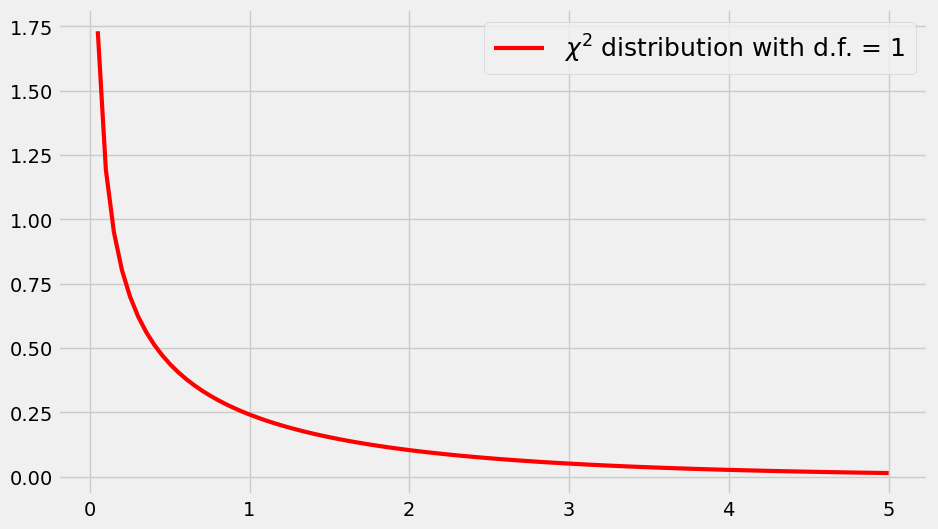

In [63]:
k = 1
x = np.linspace(0, 5, 100)
chi_pdf = sp.stats.chi2.pdf(x, k)

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(x, chi_pdf, lw = 3, c = 'r', label = '$\chi^2$ distribution with d.f. = 1')
ax.legend(fontsize = 18)
plt.show()

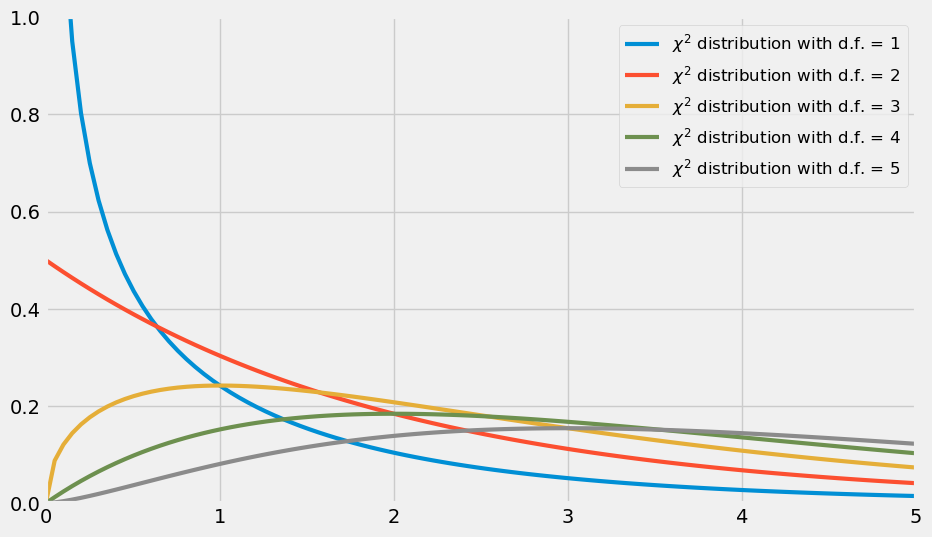

In [64]:
fig, ax = plt.subplots(figsize = (10, 6))
for i in range(1, 6):
    x = np.linspace(0, 5, 100)
    chi_pdf = sp.stats.chi2.pdf(x, i)
    ax.plot(x, chi_pdf, lw = 3, label = '$\chi^2$ distribution with d.f. = %.0d'%i)
    ax.legend(fontsize = 12)
    ax.axis([0, 5, 0, 1])
plt.show()

## <font face="gotham" color="purple"> F Distribution </font>

If $U_1$ has a $\chi^2$ distribution with $\nu_1$ d.f. and $U_2$ has a $\chi^2$ distribution with $\nu_2$ d.f., then

\begin{equation}
\frac{U_1/\nu_1}{U_2/\nu_2}\sim F(\nu_1, \nu_2)
\end{equation}

We are using $F$ distribution for ratios of variances.

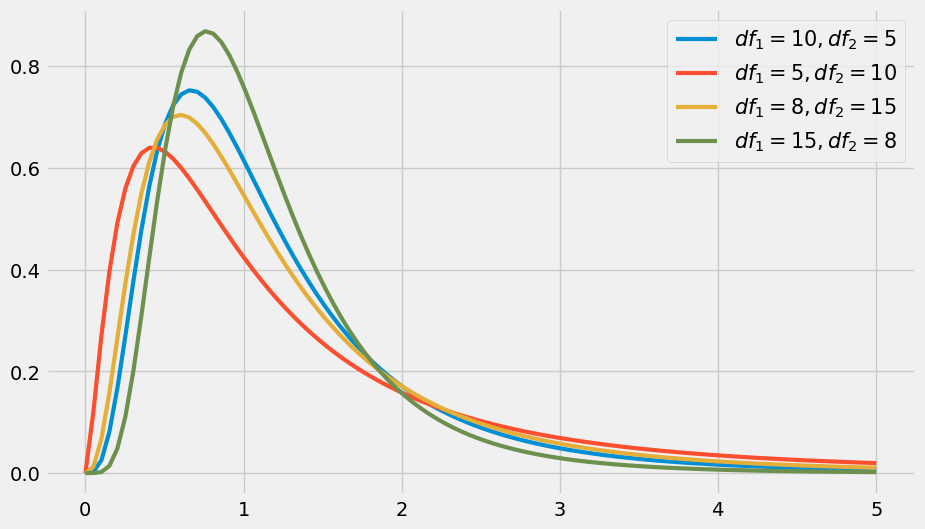

In [65]:
x = np.linspace(0, 5, 100)
fig, ax = plt.subplots(figsize = (10, 6))

df1 = [10, 5, 8, 15]
df2 = [5, 10, 15, 8]

for df in zip(df1, df2):
    f_pdf = sp.stats.f.pdf(x, dfn = df[0], dfd = df[0])
    ax.plot(x, f_pdf, lw =3, label = '$df_1 = %.d, df_2 = %.d$' %(df[0], df[1]))
ax.legend(fontsize = 15)
plt.show()

$\chi^2$ and $F$ distribution are mostly used for statistical testing, we will elaborate the topic later.

## <font face="gotham" color="purple"> Student's t Distribution </font>

The **t-distribution** is used when data are approximately normally distributed, which means the data follow a bell shape but the population variance is unknown. We will come back to this topic in chapter of estimation.

The PDF of t-distribution is derived from normal and $\chi^2$ distribution
$$
f(t)=\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu \pi} \Gamma\left(\frac{\nu}{2}\right)}\left(1+\frac{t^{2}}{\nu}\right)^{-\frac{\nu+1}{2}}
$$
where $\Gamma(\cdot)$ is the Gamma function that
$$
\Gamma(x) = (x-1)!
$$

So far we just need a visual memory about the comparison of t-distribution and normal distribution.

If a sample has $n$ observations, the degree of freedom (d.o.f.) of t-distribution is $n-1$, the larger the d.o.f. the shape is closer to normal distribution.

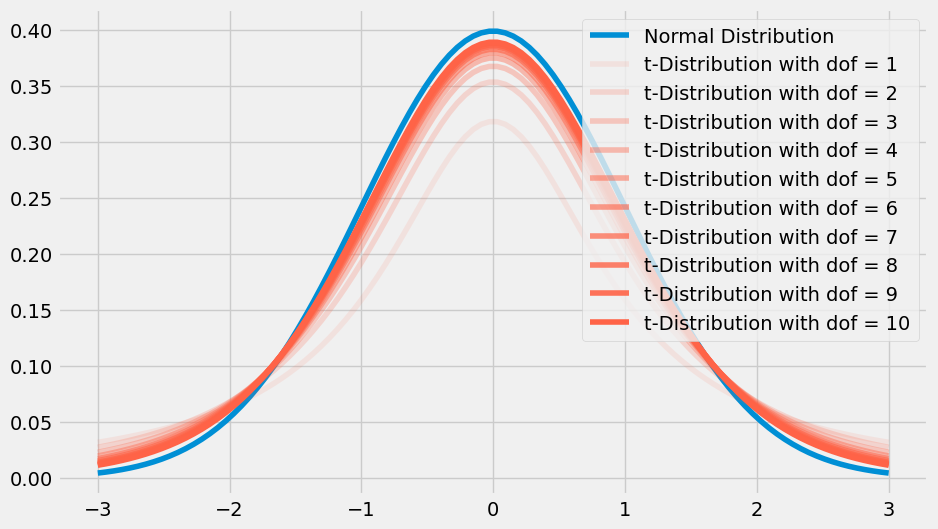

In [66]:
x = np.linspace(-3, 3, 100)
y_norm = sp.stats.norm.pdf(x, loc=0, scale=1)
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(x, y_norm, label = 'Normal Distribution')
for i in range(1, 11):
    y_t = sp.stats.t.pdf(x, df = i, loc=0, scale=1)
    ax.plot(x, y_t, color = 'tomato', alpha = .1*i, label = 't-Distribution with dof = {}'.format(i))
ax.legend()
plt.show()